<a href="https://colab.research.google.com/github/Dipon12/Generating-Synthetic-data-from-Fashion-Mnist-Dataset-using-DCGAN-Architecture-in-Keras/blob/master/Generating_Synthetic_Data_from_Fashion_Mnist_Dataset_using_DCGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
#import plot_utils
import matplotlib.pyplot as plt
from tqdm import tqdm
from IPython import display
print(tf.__version__)

2.2.0


In [2]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.fashion_mnist.load_data()
x_train = x_train/255.0
x_test = x_test/255.0

x_train =np.array(x_train)
x_test =np.array(x_test)

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


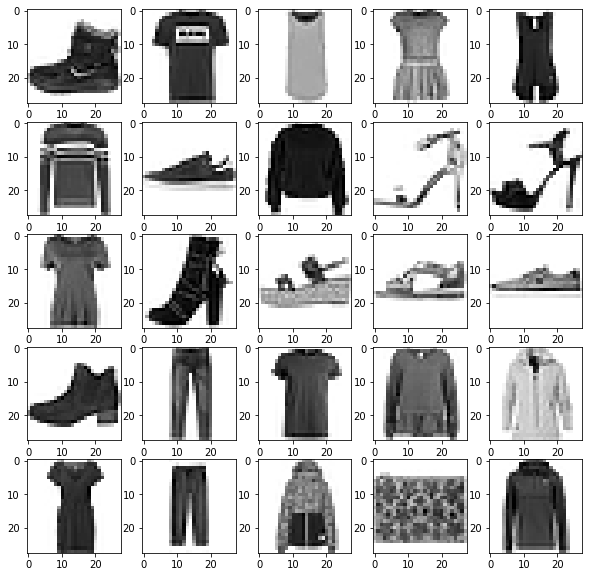

In [4]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(x_train[i],cmap='binary')
plt.show()

In [5]:
num_features = 100

generator = tf.keras.models.Sequential([
                keras.layers.Dense(units = 7*7*128,input_shape=[num_features]),
                keras.layers.Reshape([7,7,128]),
                keras.layers.BatchNormalization(),
                keras.layers.Conv2DTranspose(filters = 64, kernel_size= (5,5), strides=(2,2), padding = 'same', activation = 'selu'),
                keras.layers.BatchNormalization(),
                keras.layers.Conv2DTranspose(filters=1, kernel_size=(5,5), strides=(2,2), padding ="same", activation ='tanh')
])

generator.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6272)              633472    
_________________________________________________________________
reshape (Reshape)            (None, 7, 7, 128)         0         
_________________________________________________________________
batch_normalization (BatchNo (None, 7, 7, 128)         512       
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 14, 14, 64)        204864    
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 64)        256       
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 28, 28, 1)         1601      
Total params: 840,705
Trainable params: 840,321
Non-trainable params: 384
________________________________________________

(64, 28, 28, 1)


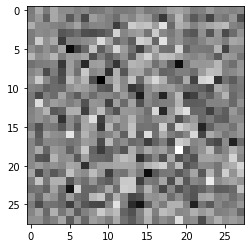

In [6]:
noise = np.random.randn(64,num_features) #1 cause ektai random pic banacchi
generated_image = generator(noise)

print(generated_image.shape)

#generated_image_show = np.squeeze(np.squeeze(generated_image[0],axis=0),axis=2) #imshow seeks for RGB..but it is binary..so ogula shoray dsi bki 2 dim

generated_image_show = np.squeeze(generated_image[0],axis=2)
plt.imshow(generated_image_show,cmap='binary') 

In [7]:
discriminator = keras.models.Sequential([
                
                keras.layers.Conv2D(filters =64 , kernel_size=(5,5), strides=(2,2), padding='same', input_shape=[28,28,1]),
                keras.layers.LeakyReLU(0.2),#0.2 hcce slope
                keras.layers.Dropout(0.3),

                keras.layers.Conv2D(filters = 128 , kernel_size=(5,5), strides=(2,2), padding='same'),
                keras.layers.LeakyReLU(0.2),#0.2 hcce slope
                keras.layers.Dropout(0.3),

                keras.layers.Flatten(),
                keras.layers.Dense(1, activation='sigmoid')


])

discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 14, 14, 64)        1664      
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 128)         204928    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 7, 7, 128)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)             

In [8]:
decision = discriminator(generated_image)
print(decision)

tf.Tensor(
[[0.5015441 ]
 [0.504235  ]
 [0.5011582 ]
 [0.49906608]
 [0.49823162]
 [0.499457  ]
 [0.50036496]
 [0.5016336 ]
 [0.5031672 ]
 [0.50167084]
 [0.49982184]
 [0.49837184]
 [0.49767768]
 [0.50245094]
 [0.50139385]
 [0.49906772]
 [0.5003022 ]
 [0.5017818 ]
 [0.49880755]
 [0.49997282]
 [0.4994552 ]
 [0.49859676]
 [0.5020498 ]
 [0.5012291 ]
 [0.5008822 ]
 [0.4993002 ]
 [0.49977908]
 [0.5027455 ]
 [0.4983321 ]
 [0.49991834]
 [0.499959  ]
 [0.4989627 ]
 [0.5009749 ]
 [0.50467587]
 [0.50242645]
 [0.49943066]
 [0.49785033]
 [0.5024054 ]
 [0.5018624 ]
 [0.49805388]
 [0.50005215]
 [0.50011575]
 [0.5027279 ]
 [0.50119615]
 [0.49795893]
 [0.5012325 ]
 [0.5006329 ]
 [0.4984462 ]
 [0.49910182]
 [0.49932677]
 [0.5003471 ]
 [0.5019369 ]
 [0.5008625 ]
 [0.4986389 ]
 [0.5018177 ]
 [0.49856427]
 [0.50288343]
 [0.5000935 ]
 [0.50081605]
 [0.49897665]
 [0.50021464]
 [0.50153977]
 [0.4991161 ]
 [0.5009979 ]], shape=(64, 1), dtype=float32)


In [9]:
discriminator.compile(loss = 'binary_crossentropy', optimizer='rmsprop',metrics=['accuracy'])
discriminator.trainable = False

GAN = tf.keras.models.Sequential([generator,discriminator])

GAN.compile(loss = 'binary_crossentropy', optimizer='rmsprop', metrics= ['accuracy'])
GAN.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 28, 28, 1)         840705    
_________________________________________________________________
sequential_1 (Sequential)    (None, 1)                 212865    
Total params: 1,053,570
Trainable params: 840,321
Non-trainable params: 213,249
_________________________________________________________________


In [0]:
generated_samples = []

def train(batch_size,no_of_epochs):

  

  for epoch in tqdm(range(no_of_epochs)):
    print("\n============================Epoch No. {}/{}===================================\n".format(epoch+1,no_of_epochs))

    for batch_no in range(int(x_train.shape[0]/batch_size)):

      print("-----------Batch no {}/{}-----------".format(batch_no+1,int(x_train.shape[0]/batch_size)))

      real_data = x_train[batch_no*batch_size : (batch_no+1)*batch_size]
      real_data = np.expand_dims(real_data, axis=3)
   
  

      noise = np.random.randn(batch_size,num_features)
      fake_data = generator.predict(noise)
      

      x_batch = np.concatenate([real_data,fake_data], axis = 0) #This batch has size of batch_size*2, mind it
      y_batch = np.concatenate([np.ones((batch_size,1)),np.zeros((batch_size,1))],axis=0)
 

      indices = np.random.choice(range(batch_size*2),size=(batch_size*2), replace=False)

      x_batch = x_batch[indices]
      y_batch = y_batch[indices]

      discriminator.trainable = True
      discriminator.fit(x_batch,y_batch) #only one step of the gradient descent
      discriminator.trainable = False


      GAN.fit(noise,np.ones((batch_size,1)))


    if epoch%int(no_of_epochs/10)==0:
      noise = np.random.randn(1,num_features)
      generated_image = generator.predict(noise)
      generated_samples.append(generated_image)

  return generated_samples


In [28]:
generated_samples = train(64,20)





  0%|          | 0/20 [00:00<?, ?it/s]


============================Epoch No. 1/20===================================

-----------Batch no 1/937-----------
2/2 [==============================] - 0s 3ms/step - loss: 5.6055 - accuracy: 0.0000e+00
-----------Batch no 2/937-----------
2/2 [==============================] - 0s 3ms/step - loss: 5.4697 - accuracy: 0.0312
-----------Batch no 3/937-----------
2/2 [==============================] - 0s 4ms/step - loss: 4.9201 - accuracy: 0.0156
-----------Batch no 4/937-----------
2/2 [==============================] - 0s 3ms/step - loss: 3.4288 - accuracy: 0.0312
-----------Batch no 5/937-----------
2/2 [==============================] - 0s 3ms/step - loss: 2.4745 - accuracy: 0.1250
-----------Batch no 6/937-----------
2/2 [==============================] - 0s 3ms/step - loss: 4.2752 - accuracy: 0.0000e+00
-----------Batch no 7/937-----------
2/2 [==============================] - 0s 3ms/step - loss: 5.1333 - accuracy: 0.0312
-----------Batch no 8/937-----------
2/2 [================





  5%|▌         | 1/20 [01:30<28:30, 90.02s/it]


============================Epoch No. 2/20===================================

-----------Batch no 1/937-----------
2/2 [==============================] - 0s 3ms/step - loss: 3.5604 - accuracy: 0.0469
-----------Batch no 2/937-----------
2/2 [==============================] - 0s 3ms/step - loss: 5.3223 - accuracy: 0.0000e+00
-----------Batch no 3/937-----------
2/2 [==============================] - 0s 3ms/step - loss: 3.5778 - accuracy: 0.0156
-----------Batch no 4/937-----------
2/2 [==============================] - 0s 3ms/step - loss: 3.2824 - accuracy: 0.0469
-----------Batch no 5/937-----------
2/2 [==============================] - 0s 3ms/step - loss: 5.7216 - accuracy: 0.0000e+00
-----------Batch no 6/937-----------
2/2 [==============================] - 0s 3ms/step - loss: 6.1730 - accuracy: 0.0000e+00
-----------Batch no 7/937-----------
2/2 [==============================] - 0s 3ms/step - loss: 3.5765 - accuracy: 0.0469
-----------Batch no 8/937-----------
2/2 [============





 10%|█         | 2/20 [02:57<26:48, 89.39s/it]


============================Epoch No. 3/20===================================

-----------Batch no 1/937-----------
2/2 [==============================] - 0s 3ms/step - loss: 4.8342 - accuracy: 0.0000e+00
-----------Batch no 2/937-----------
2/2 [==============================] - 0s 3ms/step - loss: 6.9472 - accuracy: 0.0000e+00
-----------Batch no 3/937-----------
2/2 [==============================] - 0s 3ms/step - loss: 4.0841 - accuracy: 0.0781
-----------Batch no 4/937-----------
2/2 [==============================] - 0s 3ms/step - loss: 4.1059 - accuracy: 0.0156
-----------Batch no 5/937-----------
2/2 [==============================] - 0s 3ms/step - loss: 2.3718 - accuracy: 0.2344
-----------Batch no 6/937-----------
2/2 [==============================] - 0s 3ms/step - loss: 4.2022 - accuracy: 0.0312
-----------Batch no 7/937-----------
2/2 [==============================] - 0s 2ms/step - loss: 4.8350 - accuracy: 0.0000e+00
-----------Batch no 8/937-----------
2/2 [============





 15%|█▌        | 3/20 [04:25<25:11, 88.92s/it]


============================Epoch No. 4/20===================================

-----------Batch no 1/937-----------
2/2 [==============================] - 0s 3ms/step - loss: 6.7364 - accuracy: 0.0156
-----------Batch no 2/937-----------
2/2 [==============================] - 0s 3ms/step - loss: 4.1192 - accuracy: 0.0000e+00
-----------Batch no 3/937-----------
2/2 [==============================] - 0s 3ms/step - loss: 6.3817 - accuracy: 0.0000e+00
-----------Batch no 4/937-----------
2/2 [==============================] - 0s 4ms/step - loss: 2.0447 - accuracy: 0.2188
-----------Batch no 5/937-----------
2/2 [==============================] - 0s 3ms/step - loss: 4.6721 - accuracy: 0.0156
-----------Batch no 6/937-----------
2/2 [==============================] - 0s 3ms/step - loss: 7.1436 - accuracy: 0.0000e+00
-----------Batch no 7/937-----------
2/2 [==============================] - 0s 3ms/step - loss: 3.8725 - accuracy: 0.0000e+00
-----------Batch no 8/937-----------
2/2 [========





 20%|██        | 4/20 [05:53<23:36, 88.54s/it]


============================Epoch No. 5/20===================================

-----------Batch no 1/937-----------
2/2 [==============================] - 0s 2ms/step - loss: 4.9964 - accuracy: 0.0156
-----------Batch no 2/937-----------
2/2 [==============================] - 0s 3ms/step - loss: 5.2597 - accuracy: 0.0156
-----------Batch no 3/937-----------
2/2 [==============================] - 0s 3ms/step - loss: 3.5622 - accuracy: 0.0156
-----------Batch no 4/937-----------
2/2 [==============================] - 0s 3ms/step - loss: 3.9368 - accuracy: 0.0312
-----------Batch no 5/937-----------
2/2 [==============================] - 0s 3ms/step - loss: 4.9263 - accuracy: 0.0000e+00
-----------Batch no 6/937-----------
2/2 [==============================] - 0s 3ms/step - loss: 5.9062 - accuracy: 0.0000e+00
-----------Batch no 7/937-----------
2/2 [==============================] - 0s 3ms/step - loss: 3.1158 - accuracy: 0.0938
-----------Batch no 8/937-----------
2/2 [================





 25%|██▌       | 5/20 [07:20<21:59, 87.97s/it]


============================Epoch No. 6/20===================================

-----------Batch no 1/937-----------
2/2 [==============================] - 0s 3ms/step - loss: 4.3075 - accuracy: 0.0000e+00
-----------Batch no 2/937-----------
2/2 [==============================] - 0s 3ms/step - loss: 4.7648 - accuracy: 0.0156
-----------Batch no 3/937-----------
2/2 [==============================] - 0s 3ms/step - loss: 4.7621 - accuracy: 0.0156
-----------Batch no 4/937-----------
2/2 [==============================] - 0s 3ms/step - loss: 2.1703 - accuracy: 0.2656
-----------Batch no 5/937-----------
2/2 [==============================] - 0s 3ms/step - loss: 5.2687 - accuracy: 0.0156
-----------Batch no 6/937-----------
2/2 [==============================] - 0s 3ms/step - loss: 4.3215 - accuracy: 0.0156
-----------Batch no 7/937-----------
2/2 [==============================] - 0s 3ms/step - loss: 6.6950 - accuracy: 0.0000e+00
-----------Batch no 8/937-----------
2/2 [================





 30%|███       | 6/20 [08:46<20:25, 87.53s/it]


============================Epoch No. 7/20===================================

-----------Batch no 1/937-----------
2/2 [==============================] - 0s 3ms/step - loss: 6.2217 - accuracy: 0.0156
-----------Batch no 2/937-----------
2/2 [==============================] - 0s 3ms/step - loss: 2.8226 - accuracy: 0.0625
-----------Batch no 3/937-----------
2/2 [==============================] - 0s 3ms/step - loss: 3.7381 - accuracy: 0.0312
-----------Batch no 4/937-----------
2/2 [==============================] - 0s 3ms/step - loss: 2.8603 - accuracy: 0.1094
-----------Batch no 5/937-----------
2/2 [==============================] - 0s 3ms/step - loss: 2.7791 - accuracy: 0.1562
-----------Batch no 6/937-----------
2/2 [==============================] - 0s 3ms/step - loss: 4.7115 - accuracy: 0.0000e+00
-----------Batch no 7/937-----------
2/2 [==============================] - 0s 3ms/step - loss: 2.8150 - accuracy: 0.0938
-----------Batch no 8/937-----------
2/2 [====================





 35%|███▌      | 7/20 [10:15<19:02, 87.89s/it]


============================Epoch No. 8/20===================================

-----------Batch no 1/937-----------
2/2 [==============================] - 0s 3ms/step - loss: 2.4575 - accuracy: 0.1094
-----------Batch no 2/937-----------
2/2 [==============================] - 0s 2ms/step - loss: 1.8339 - accuracy: 0.2344
-----------Batch no 3/937-----------
2/2 [==============================] - 0s 3ms/step - loss: 4.7124 - accuracy: 0.0000e+00
-----------Batch no 4/937-----------
2/2 [==============================] - 0s 4ms/step - loss: 2.3738 - accuracy: 0.1875
-----------Batch no 5/937-----------
2/2 [==============================] - 0s 3ms/step - loss: 3.9654 - accuracy: 0.0469
-----------Batch no 6/937-----------
2/2 [==============================] - 0s 3ms/step - loss: 4.0080 - accuracy: 0.0469
-----------Batch no 7/937-----------
2/2 [==============================] - 0s 3ms/step - loss: 3.0886 - accuracy: 0.1250
-----------Batch no 8/937-----------
2/2 [====================





 40%|████      | 8/20 [11:40<17:26, 87.23s/it]


============================Epoch No. 9/20===================================

-----------Batch no 1/937-----------
2/2 [==============================] - 0s 3ms/step - loss: 3.9954 - accuracy: 0.0156
-----------Batch no 2/937-----------
2/2 [==============================] - 0s 3ms/step - loss: 4.1624 - accuracy: 0.0312
-----------Batch no 3/937-----------
2/2 [==============================] - 0s 3ms/step - loss: 4.1569 - accuracy: 0.0156
-----------Batch no 4/937-----------
2/2 [==============================] - 0s 3ms/step - loss: 4.0041 - accuracy: 0.0469
-----------Batch no 5/937-----------
2/2 [==============================] - 0s 3ms/step - loss: 2.5202 - accuracy: 0.1406
-----------Batch no 6/937-----------
2/2 [==============================] - 0s 3ms/step - loss: 5.5485 - accuracy: 0.0000e+00
-----------Batch no 7/937-----------
2/2 [==============================] - 0s 3ms/step - loss: 4.8244 - accuracy: 0.0312
-----------Batch no 8/937-----------
2/2 [====================





 45%|████▌     | 9/20 [13:06<15:54, 86.79s/it]


============================Epoch No. 10/20===================================

-----------Batch no 1/937-----------
2/2 [==============================] - 0s 3ms/step - loss: 1.0938 - accuracy: 0.5312
-----------Batch no 2/937-----------
2/2 [==============================] - 0s 3ms/step - loss: 3.0757 - accuracy: 0.0312
-----------Batch no 3/937-----------
2/2 [==============================] - 0s 3ms/step - loss: 4.1952 - accuracy: 0.0312
-----------Batch no 4/937-----------
2/2 [==============================] - 0s 3ms/step - loss: 4.2740 - accuracy: 0.0156
-----------Batch no 5/937-----------
2/2 [==============================] - 0s 3ms/step - loss: 3.7976 - accuracy: 0.0312
-----------Batch no 6/937-----------
2/2 [==============================] - 0s 3ms/step - loss: 5.7479 - accuracy: 0.0000e+00
-----------Batch no 7/937-----------
2/2 [==============================] - 0s 2ms/step - loss: 4.3308 - accuracy: 0.0156
-----------Batch no 8/937-----------
2/2 [===================





 50%|█████     | 10/20 [14:32<14:25, 86.53s/it]


============================Epoch No. 11/20===================================

-----------Batch no 1/937-----------
2/2 [==============================] - 0s 4ms/step - loss: 4.2327 - accuracy: 0.0625
-----------Batch no 2/937-----------
2/2 [==============================] - 0s 3ms/step - loss: 3.0562 - accuracy: 0.1094
-----------Batch no 3/937-----------
2/2 [==============================] - 0s 3ms/step - loss: 2.5516 - accuracy: 0.1875
-----------Batch no 4/937-----------
2/2 [==============================] - 0s 3ms/step - loss: 3.4027 - accuracy: 0.0312
-----------Batch no 5/937-----------
2/2 [==============================] - 0s 3ms/step - loss: 2.7011 - accuracy: 0.1094
-----------Batch no 6/937-----------
2/2 [==============================] - 0s 3ms/step - loss: 4.5890 - accuracy: 0.0156
-----------Batch no 7/937-----------
2/2 [==============================] - 0s 3ms/step - loss: 4.6815 - accuracy: 0.0000e+00
-----------Batch no 8/937-----------
2/2 [===================





 55%|█████▌    | 11/20 [15:59<12:58, 86.55s/it]


============================Epoch No. 12/20===================================

-----------Batch no 1/937-----------
2/2 [==============================] - 0s 3ms/step - loss: 6.3991 - accuracy: 0.0000e+00
-----------Batch no 2/937-----------
2/2 [==============================] - 0s 3ms/step - loss: 5.4021 - accuracy: 0.0000e+00
-----------Batch no 3/937-----------
2/2 [==============================] - 0s 3ms/step - loss: 4.8113 - accuracy: 0.0469
-----------Batch no 4/937-----------
2/2 [==============================] - 0s 3ms/step - loss: 3.1010 - accuracy: 0.0625
-----------Batch no 5/937-----------
2/2 [==============================] - 0s 3ms/step - loss: 3.8690 - accuracy: 0.0312
-----------Batch no 6/937-----------
2/2 [==============================] - 0s 3ms/step - loss: 5.3396 - accuracy: 0.0000e+00
-----------Batch no 7/937-----------
2/2 [==============================] - 0s 3ms/step - loss: 3.5722 - accuracy: 0.0156
-----------Batch no 8/937-----------
2/2 [===========





 60%|██████    | 12/20 [17:27<11:37, 87.15s/it]


============================Epoch No. 13/20===================================

-----------Batch no 1/937-----------
2/2 [==============================] - 0s 3ms/step - loss: 4.7246 - accuracy: 0.0000e+00
-----------Batch no 2/937-----------
2/2 [==============================] - 0s 3ms/step - loss: 3.4425 - accuracy: 0.0625
-----------Batch no 3/937-----------
2/2 [==============================] - 0s 3ms/step - loss: 5.5330 - accuracy: 0.0000e+00
-----------Batch no 4/937-----------
2/2 [==============================] - 0s 3ms/step - loss: 3.9624 - accuracy: 0.0312
-----------Batch no 5/937-----------
2/2 [==============================] - 0s 3ms/step - loss: 6.4451 - accuracy: 0.0000e+00
-----------Batch no 6/937-----------
2/2 [==============================] - 0s 3ms/step - loss: 4.0202 - accuracy: 0.0156
-----------Batch no 7/937-----------
2/2 [==============================] - 0s 3ms/step - loss: 4.4135 - accuracy: 0.0156
-----------Batch no 8/937-----------
2/2 [===========





 65%|██████▌   | 13/20 [18:55<10:12, 87.44s/it]


============================Epoch No. 14/20===================================

-----------Batch no 1/937-----------
2/2 [==============================] - 0s 3ms/step - loss: 1.6150 - accuracy: 0.2969
-----------Batch no 2/937-----------
2/2 [==============================] - 0s 3ms/step - loss: 3.6389 - accuracy: 0.0312
-----------Batch no 3/937-----------
2/2 [==============================] - 0s 3ms/step - loss: 3.0746 - accuracy: 0.0625
-----------Batch no 4/937-----------
2/2 [==============================] - 0s 3ms/step - loss: 2.0382 - accuracy: 0.2031
-----------Batch no 5/937-----------
2/2 [==============================] - 0s 3ms/step - loss: 4.0337 - accuracy: 0.0469
-----------Batch no 6/937-----------
2/2 [==============================] - 0s 3ms/step - loss: 5.1003 - accuracy: 0.0000e+00
-----------Batch no 7/937-----------
2/2 [==============================] - 0s 3ms/step - loss: 5.5010 - accuracy: 0.0000e+00
-----------Batch no 8/937-----------
2/2 [===============





 70%|███████   | 14/20 [20:24<08:46, 87.76s/it]


============================Epoch No. 15/20===================================

-----------Batch no 1/937-----------
2/2 [==============================] - 0s 3ms/step - loss: 6.1861 - accuracy: 0.0156
-----------Batch no 2/937-----------
2/2 [==============================] - 0s 3ms/step - loss: 3.7309 - accuracy: 0.0156
-----------Batch no 3/937-----------
2/2 [==============================] - 0s 3ms/step - loss: 4.2590 - accuracy: 0.0625
-----------Batch no 4/937-----------
2/2 [==============================] - 0s 3ms/step - loss: 5.0858 - accuracy: 0.0000e+00
-----------Batch no 5/937-----------
2/2 [==============================] - 0s 3ms/step - loss: 8.5517 - accuracy: 0.0000e+00
-----------Batch no 6/937-----------
2/2 [==============================] - 0s 3ms/step - loss: 5.0708 - accuracy: 0.0000e+00
-----------Batch no 7/937-----------
2/2 [==============================] - 0s 3ms/step - loss: 5.3662 - accuracy: 0.0000e+00
-----------Batch no 8/937-----------
2/2 [=======





 75%|███████▌  | 15/20 [21:52<07:18, 87.77s/it]


============================Epoch No. 16/20===================================

-----------Batch no 1/937-----------
2/2 [==============================] - 0s 2ms/step - loss: 2.5270 - accuracy: 0.0938
-----------Batch no 2/937-----------
2/2 [==============================] - 0s 4ms/step - loss: 3.8273 - accuracy: 0.0469
-----------Batch no 3/937-----------
2/2 [==============================] - 0s 5ms/step - loss: 4.7643 - accuracy: 0.0000e+00
-----------Batch no 4/937-----------
2/2 [==============================] - 0s 3ms/step - loss: 2.2962 - accuracy: 0.2188
-----------Batch no 5/937-----------
2/2 [==============================] - 0s 3ms/step - loss: 3.2170 - accuracy: 0.0625
-----------Batch no 6/937-----------
2/2 [==============================] - 0s 3ms/step - loss: 4.7270 - accuracy: 0.0000e+00
-----------Batch no 7/937-----------
2/2 [==============================] - 0s 4ms/step - loss: 3.9679 - accuracy: 0.0625
-----------Batch no 8/937-----------
2/2 [===============





 80%|████████  | 16/20 [23:19<05:50, 87.70s/it]


============================Epoch No. 17/20===================================

-----------Batch no 1/937-----------
2/2 [==============================] - 0s 3ms/step - loss: 4.2828 - accuracy: 0.1094
-----------Batch no 2/937-----------
2/2 [==============================] - 0s 3ms/step - loss: 1.7805 - accuracy: 0.2969
-----------Batch no 3/937-----------
2/2 [==============================] - 0s 3ms/step - loss: 4.9303 - accuracy: 0.0156
-----------Batch no 4/937-----------
2/2 [==============================] - 0s 2ms/step - loss: 6.2992 - accuracy: 0.0000e+00
-----------Batch no 5/937-----------
2/2 [==============================] - 0s 2ms/step - loss: 2.8845 - accuracy: 0.1406
-----------Batch no 6/937-----------
2/2 [==============================] - 0s 3ms/step - loss: 2.8377 - accuracy: 0.1875
-----------Batch no 7/937-----------
2/2 [==============================] - 0s 3ms/step - loss: 2.0437 - accuracy: 0.1719
-----------Batch no 8/937-----------
2/2 [===================





 85%|████████▌ | 17/20 [24:46<04:22, 87.39s/it]


============================Epoch No. 18/20===================================

-----------Batch no 1/937-----------
2/2 [==============================] - 0s 3ms/step - loss: 2.9531 - accuracy: 0.1250
-----------Batch no 2/937-----------
2/2 [==============================] - 0s 3ms/step - loss: 3.7490 - accuracy: 0.0781
-----------Batch no 3/937-----------
2/2 [==============================] - 0s 3ms/step - loss: 5.1207 - accuracy: 0.0156
-----------Batch no 4/937-----------
2/2 [==============================] - 0s 3ms/step - loss: 4.3329 - accuracy: 0.0938
-----------Batch no 5/937-----------
2/2 [==============================] - 0s 3ms/step - loss: 2.3629 - accuracy: 0.2656
-----------Batch no 6/937-----------
2/2 [==============================] - 0s 3ms/step - loss: 6.5379 - accuracy: 0.0000e+00
-----------Batch no 7/937-----------
2/2 [==============================] - 0s 3ms/step - loss: 4.0427 - accuracy: 0.0156
-----------Batch no 8/937-----------
2/2 [===================





 90%|█████████ | 18/20 [26:13<02:54, 87.33s/it]


============================Epoch No. 19/20===================================

-----------Batch no 1/937-----------
2/2 [==============================] - 0s 3ms/step - loss: 1.8030 - accuracy: 0.2344
-----------Batch no 2/937-----------
2/2 [==============================] - 0s 3ms/step - loss: 4.2936 - accuracy: 0.0312
-----------Batch no 3/937-----------
2/2 [==============================] - 0s 3ms/step - loss: 5.5953 - accuracy: 0.0156
-----------Batch no 4/937-----------
2/2 [==============================] - 0s 3ms/step - loss: 4.7524 - accuracy: 0.0469
-----------Batch no 5/937-----------
2/2 [==============================] - 0s 3ms/step - loss: 4.9435 - accuracy: 0.0156
-----------Batch no 6/937-----------
2/2 [==============================] - 0s 3ms/step - loss: 5.5247 - accuracy: 0.0000e+00
-----------Batch no 7/937-----------
2/2 [==============================] - 0s 3ms/step - loss: 3.5034 - accuracy: 0.0625
-----------Batch no 8/937-----------
2/2 [===================





 95%|█████████▌| 19/20 [27:39<01:26, 86.83s/it]


============================Epoch No. 20/20===================================

-----------Batch no 1/937-----------
2/2 [==============================] - 0s 3ms/step - loss: 6.1616 - accuracy: 0.0156
-----------Batch no 2/937-----------
2/2 [==============================] - 0s 3ms/step - loss: 3.7866 - accuracy: 0.0625
-----------Batch no 3/937-----------
2/2 [==============================] - 0s 3ms/step - loss: 4.2033 - accuracy: 0.0469
-----------Batch no 4/937-----------
2/2 [==============================] - 0s 3ms/step - loss: 5.6032 - accuracy: 0.0000e+00
-----------Batch no 5/937-----------
2/2 [==============================] - 0s 3ms/step - loss: 3.0430 - accuracy: 0.0938
-----------Batch no 6/937-----------
2/2 [==============================] - 0s 2ms/step - loss: 4.0619 - accuracy: 0.0000e+00
-----------Batch no 7/937-----------
2/2 [==============================] - 0s 3ms/step - loss: 3.4609 - accuracy: 0.0469
-----------Batch no 8/937-----------
2/2 [===============





100%|██████████| 20/20 [29:05<00:00, 87.26s/it]


(10, 28, 28, 1)


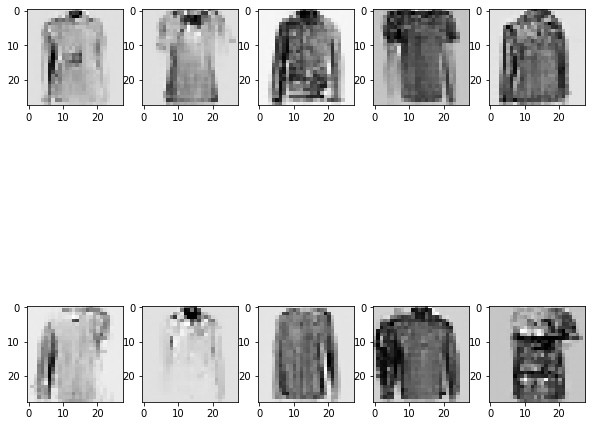

In [33]:
plt.figure(figsize=(10,10))
generated_samples = np.array(generated_samples)
generated_samples = np.squeeze(generated_samples, axis=1)
print(generated_samples.shape)

for i in range(10):
  plt.subplot(2,5,i+1)
  plt.imshow(np.squeeze(generated_samples[i],axis=2),cmap='binary')

plt.show()